In [17]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [18]:
# importing libraries for data visualisations
import seaborn as sns
# import plotly.plotly as py
import chart_studio.plotly as py

from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly
# import plotly.plotly as py
import chart_studio.plotly as py

import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [19]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [20]:
# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse

In [21]:
df = pd.read_excel(
    '/content/WA_Fn-UseC_-HR-Employee-Attrition.xlsx', sheet_name=0)
print("Shape of dataframe is: {}".format(df.shape))

Shape of dataframe is: (1470, 35)


In [22]:
dft = df.copy()

In [23]:
dft.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [24]:
dft.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [25]:
dft.columns.to_series().groupby(dft.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [26]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [27]:
dft.isnull()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                False      False           False          False   
2                False      False           False          False   
3                False      False           False          False   
4                False      False           False          False   
...                ...        ...             ...            ...   
1465             False      False           False          False   
1466             False      False           False          False   
1467             False      False           False          False   
1468             False      False           False          False   
1469             False      False           False          False   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0              False                    False   False       False   
1              False                    False   False       False   
2              False                    False   False       False   
3              False                    False   False       False   
4              False                    False   False       False   
...              ...                      ...     ...         ...   
1465           False                    False   False       False   
1466           False                    False   False       False   
1467           False                    False   False       False   
1468           False                    False   False       False   
1469           False                    False   False       False   

      JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0              False     False    False            False          False   
1              False     False    False            False          False   
2              False     False    False            False          False   
3              False     False    False            False          False   
4              False     False    False            False          False   
...              ...       ...      ...              ...            ...   
1465           False     False    False            False          False   
1466           False     False    False            False          False   
1467           False     False    False            False          False   
1468           False     False    False            False          False   
1469           False     False    False            False          False   

      MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  \
0             False        False               False   False     False   
1             False        False               False   False     False   
2             False        False               False   False     False   
3             False        False               False   False     False   
4             False        False               False   False     False   
...             ...          ...                 ...     ...       ...   
1465          False        False               False   False     False   
1466          False        False               False   False     False   
1467          

In [28]:
dft.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

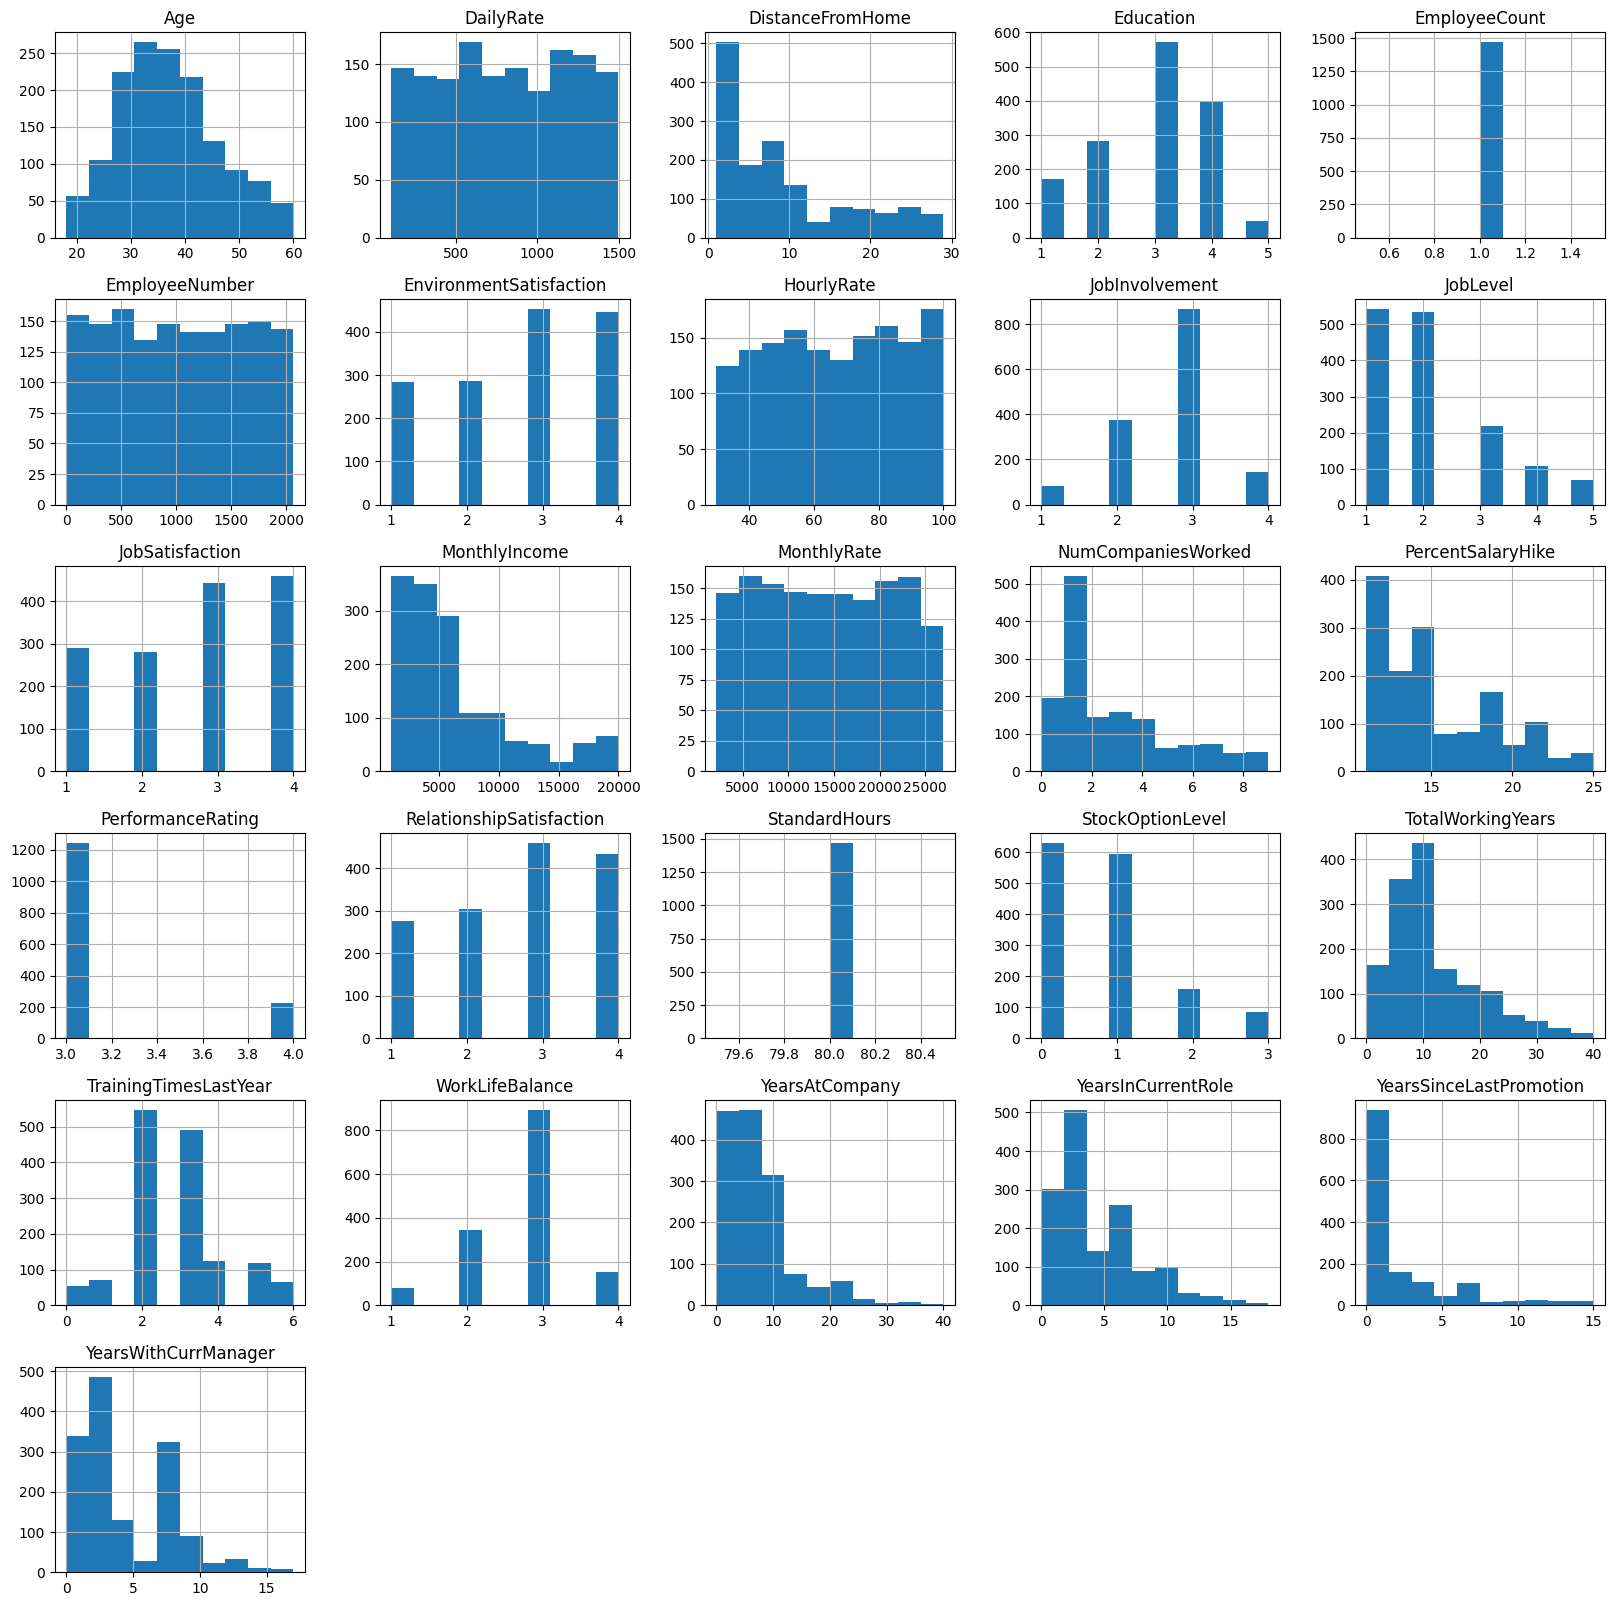

In [29]:
dft.hist(figsize=(20,20))
plt.show()

# Exploratory Data Analysis





> The standard hours and employee count are constant they are more likely to be redundant values.




In [30]:
dft.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [31]:
# Calculate average age and standard deviation for attrition 'Yes' and 'No'
mean_age_yes = dft[dft['Attrition'] == 'Yes']['Age'].mean()
std_age_yes = dft[dft['Attrition'] == 'Yes']['Age'].std()

mean_age_no = dft[dft['Attrition'] == 'No']['Age'].mean()
std_age_no = dft[dft['Attrition'] == 'No']['Age'].std()

# Print the results
print('Ex-employees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mean_age_yes, std_age_yes))
print('Current employees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mean_age_no, std_age_no))


Ex-employees: average age = 33.6 years old and standard deviation = 9.7
Current employees: average age = 37.6 years old and standard deviation = 8.9


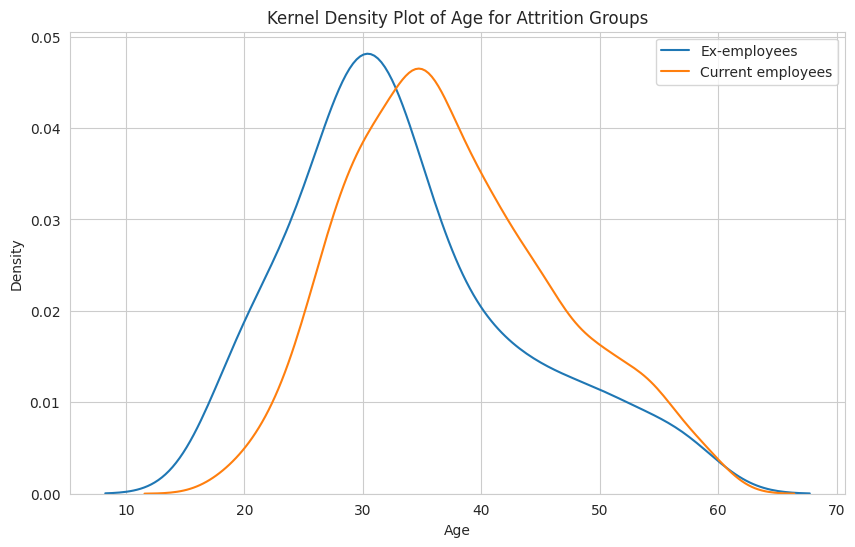

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create kernel density plots for 'Yes' and 'No' attrition groups
sns.kdeplot(data=dft[dft['Attrition'] == 'Yes'], x='Age', label='Ex-employees', ax=ax)
sns.kdeplot(data=dft[dft['Attrition'] == 'No'], x='Age', label='Current employees', ax=ax)

# Set the title and labels
ax.set_title('Kernel Density Plot of Age for Attrition Groups')
ax.set_xlabel('Age')
ax.set_ylabel('Density')

# Show the legend
ax.legend()

# Show the plot
plt.show()


In [33]:
# Education Field of employees
dft['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [34]:
import pandas as pd
import plotly.express as px
from IPython.display import HTML

# Assuming dft is your DataFrame

# Get the value counts for EducationField
education_counts = dft['EducationField'].value_counts()

# Get the value counts for EducationField for employees who left
left_education_counts = dft[dft['Attrition'] == 'Yes']['EducationField'].value_counts()

# Calculate the percentage of people who left in each education field
percentage_left = (left_education_counts / education_counts) * 100

# Create a DataFrame for plotting
data = pd.DataFrame({'EducationField': percentage_left.index, 'PercentageLeft': percentage_left.values})

# Create an interactive bar chart with custom colors
fig = px.bar(data, x='EducationField', y='PercentageLeft',
             title='Percentage of Employees Who Left by Education Field',
             labels={'EducationField': 'Education Field', 'PercentageLeft': 'Percentage Left (%)'},
             color='PercentageLeft',
             color_continuous_scale='blues_r',  # Reverse the color scale for higher values
             range_color=(0, 100),  # Set the color scale range from 0 to 100%
             )

# Update layout
fig.update_layout(xaxis_tickangle=-45)

# Convert the figure to HTML
fig_html = fig.to_html()

# Display the HTML
HTML(fig_html)


# Gender

In [35]:
dft['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [36]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of male and female employees who left
male_left_count = dft[(dft['Attrition'] == 'Yes') & (dft['Gender'] == 'Male')].shape[0]
female_left_count = dft[(dft['Attrition'] == 'Yes') & (dft['Gender'] == 'Female')].shape[0]

print("Count of people who left: {}".format(left_count))
print("Count of male employees who left: {}".format(male_left_count))
print("Count of female employees who left: {}".format(female_left_count))


Count of people who left: 237
Count of male employees who left: 150
Count of female employees who left: 87


In [37]:
import pandas as pd
import plotly.express as px
from IPython.display import HTML

# Assuming dft is your DataFrame

# Filter the DataFrame to include only employees who left (where attrition is 'Yes')
left_employees = dft[dft['Attrition'] == 'Yes']

# Get the value counts of gender for employees who left
gender_counts = left_employees['Gender'].value_counts()

# Create a DataFrame
df_gender = pd.DataFrame({'Gender': gender_counts.index, 'Count': gender_counts.values})

# Calculate the normalized distribution
df_gender['Normalized'] = df_gender['Count'] / df_gender['Count'].sum() * 100

# Create a pie chart
fig = px.pie(df_gender, values='Normalized', names='Gender', title='Normalized Gender Distribution of Employees Who Left')

# Update layout
fig.update_traces(textposition='inside', textinfo='percent+label')

# Convert the figure to HTML
fig_html = fig.to_html()

# Display the HTML
HTML(fig_html)


In [38]:
print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format(
    (dft[(dft['Attrition'] == 'Yes') & (dft['Gender'] == 'Male')].shape[0] / dft[dft['Gender'] == 'Male'].shape[0]) * 100,
    (dft[(dft['Attrition'] == 'Yes') & (dft['Gender'] == 'Female')].shape[0] / dft[dft['Gender'] == 'Female'].shape[0]) * 100))


Normalised gender distribution of ex-employees in the dataset: Male = 17.0%; Female 14.8%.




```
# Male employes are the most employes who left
Gender distribution shows that the dataset features a higher relative proportion of male ex-employees than female ex-employees, with normalised gender distribution of ex-employees in the dataset at 17.0% for Males and 14.8% for Females.
```



#. Marritial status

In [39]:
# Marital Status of employees
dft['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [40]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by marital status
marital_status_counts = dft[dft['Attrition'] == 'Yes']['MaritalStatus'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by marital status
for status, count in marital_status_counts.items():
    print("Count of {} employees who left: {}".format(status, count))


Count of people who left: 237
Count of Single employees who left: 120
Count of Married employees who left: 84
Count of Divorced employees who left: 33


In [41]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by marital status
marital_status_counts = dft[dft['Attrition'] == 'Yes']['MaritalStatus'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Calculate and print the percentage of employees who left by marital status
for status, count in marital_status_counts.items():
    percentage = (count / left_count) * 100
    print("Percentage of {} employees who left: {:.2f}%".format(status, percentage))


Count of people who left: 237
Percentage of Single employees who left: 50.63%
Percentage of Married employees who left: 35.44%
Percentage of Divorced employees who left: 13.92%


In [42]:
import plotly.io as pio
pio.renderers.default = 'colab'


In [43]:
import plotly.express as px

# Get the value counts of MaritalStatus for employees who left
left_marital_counts = dft[dft['Attrition'] == 'Yes']['MaritalStatus'].value_counts().reset_index()
left_marital_counts.columns = ['MaritalStatus', 'Count']

# Create a horizontal bar chart
fig = px.bar(left_marital_counts, x='MaritalStatus', y='Count',
             title='Count of Employees Who Left by Marital Status',
             labels={'MaritalStatus': 'Marital Status', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='Marital Status', yaxis_title='Count',
                  xaxis_categoryorder='total descending',  # Order bars by total count
                  margin=dict(l=0, r=0, b=0, t=30))

# Show plot
fig.show()




```
# 50 percentage of the people who left the company are single members
```



# DistancefromHome



```
# Distance from home for employees to get to work varies from 1 to 29 miles. There is no discernable strong correlation between Distance from Home and Attrition Status as per the KDE plot below.
```



In [44]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(dft['DistanceFromHome'].min(),
                                                                                       dft['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [45]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    dft[dft['Attrition'] == 'No']['DistanceFromHome'].mean(), dft[dft['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


In [46]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Add histogram data
x1 = dft[dft['Attrition'] == 'No']['DistanceFromHome']
x2 = dft[dft['Attrition'] == 'Yes']['DistanceFromHome']

# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=2, show_hist=False, show_rug=False)

# Add title
fig.update_layout(title='Distance From Home Distribution by Attrition Status', xaxis_title='Distance from Home', yaxis_title='Density')

# Show plot
fig.show()


# Department

In [47]:
# The organisation consists of several departments
dft['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [48]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by department
department_counts = dft[dft['Attrition'] == 'Yes']['Department'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by department
for department, count in department_counts.items():
    print("Count of {} employees who left: {}".format(department, count))


Count of people who left: 237
Count of Research & Development employees who left: 133
Count of Sales employees who left: 92
Count of Human Resources employees who left: 12


In [49]:
import plotly.express as px

# Get the count of people who left by department
left_department_counts = dft[dft['Attrition'] == 'Yes']['Department'].value_counts().reset_index()
left_department_counts.columns = ['Department', 'Count']

# Create a bar plot
fig = px.bar(left_department_counts, x='Department', y='Count',
             title='Count of Employees Who Left by Department',
             color='Department',
             labels={'Department': 'Department', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='Department', yaxis_title='Count')

# Show plot
fig.show()


# Role and work condition




> A preliminary look at the relationship between Business Travel frequency and Attrition Status shows that there is a largest normalized proportion of Leavers for employees that travel "frequently". Travel metrics associated with Business Travel status were not disclosed (i.e. how many hours of Travel is considered "Frequent").




In [50]:
# Employees have different business travel commitmnent depending on their roles and level in the organisation
dft['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [51]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['BusinessTravel'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))


Count of people who left: 237
Count of Travel_Rarely employees who left: 156
Count of Travel_Frequently employees who left: 69
Count of Non-Travel employees who left: 12


In [52]:
import plotly.express as px

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['BusinessTravel'].value_counts().reset_index()
business_travel_counts.columns = ['BusinessTravel', 'Count']

# Create a bar plot
fig = px.bar(business_travel_counts, x='BusinessTravel', y='Count',
             title='Count of Employees Who Left by Business Travel Type',
             color = 'BusinessTravel',
             labels={'BusinessTravel': 'Business Travel Type', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='Business Travel Type', yaxis_title='Count')

# Show plot
fig.show()


In [53]:
import plotly.express as px

# Calculate the percentage of leavers for each category of BusinessTravel
leavers_percentages = dft[dft['Attrition'] == 'Yes'].groupby('BusinessTravel').size() / dft.groupby('BusinessTravel').size() * 100

# Create a DataFrame for the results
df_BusinessTravel = pd.DataFrame({'Business Travel': leavers_percentages.index, '% of Leavers': leavers_percentages.values})

# Create a bar plot
fig = px.bar(df_BusinessTravel, x='Business Travel', y='% of Leavers',
             title='Percentage of Employees Who Left by Business Travel Type',
             labels={'Business Travel': 'Business Travel Type', '% of Leavers': '% of Leavers'})

# Show plot
fig.show()


# Job role

> Several Job Roles are listed in the dataset: Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources.

In [54]:
# Employees in the database have several roles on-file
dft['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [55]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['JobRole'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of Laboratory Technician employees who left: 62
Count of Sales Executive employees who left: 57
Count of Research Scientist employees who left: 47
Count of Sales Representative employees who left: 33
Count of Human Resources employees who left: 12
Count of Manufacturing Director employees who left: 10
Count of Healthcare Representative employees who left: 9
Count of Manager employees who left: 5
Count of Research Director employees who left: 2


In [56]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['JobRole'].value_counts().reset_index()
job_role_counts.columns = ['JobRole', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='JobRole', y='Count',
             title='Count of Employees Who Left by Job Role',
             color = 'JobRole',
             labels={'JobRole': 'Job Role', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='Job Role', yaxis_title='Count')

# Show plot
fig.show()


In [57]:
import plotly.express as px

# Calculate the percentage of leavers for each category of JobRole
leavers_percentages = dft[dft['Attrition'] == 'Yes'].groupby('JobRole').size() / dft.groupby('JobRole').size() * 100

# Create a DataFrame for the results
df_JobRole = pd.DataFrame({'Job Role': leavers_percentages.index, '% of Leavers': leavers_percentages.values})

# Create a bar plot
fig = px.bar(df_JobRole, x='Job Role', y='% of Leavers',
             title='Percentage of Employees Who Left by Job Role',
             labels={'Job Role': 'Job Role', '% of Leavers': '% of Leavers'})

# Show plot
fig.show()


# Joblevel

> Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director). Employees with an assigned Job Level of "1" show the largest normalized proportion of people left.

In [58]:
dft['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [59]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['JobLevel'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 1 employees who left: 143
Count of 2 employees who left: 52
Count of 3 employees who left: 32
Count of 5 employees who left: 5
Count of 4 employees who left: 5


In [60]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['JobLevel'].value_counts().reset_index()
job_role_counts.columns = ['JobLevel', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='JobLevel', y='Count',
             title='Count of Employees Who Left by JobLevel',
             color = 'JobLevel',
             labels={'JobLevel': 'JobLevel', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='Job Level', yaxis_title='Count')

# Show plot
fig.show()


In [61]:
import plotly.express as px

# Calculate the percentage of leavers for each category of JobRole
leavers_percentages = dft[dft['Attrition'] == 'Yes'].groupby('JobLevel').size() / dft.groupby('JobLevel').size() * 100

# Create a DataFrame for the results
df_JobRole = pd.DataFrame({'JobLevel': leavers_percentages.index, '% of Leavers': leavers_percentages.values})

# Create a bar plot
fig = px.bar(df_JobRole, x='JobLevel', y='% of Leavers',
             title='Percentage of Employees Who Left by JobLevel',
             color = "JobLevel",
             labels={'JobLevel': 'JobLevel', '% of Leavers': '% of Leavers'})

# Show plot
fig.show()


# Job Involvement

> A ranking is associated to the employee's Job Involvement :1 'Low' 2 'Medium' 3 'High' 4 'Very High'. The plot below indicates a negative correlation with the Job Involvement of an employee and the Attrition Status. In other words, employees with higher Job Involvement are less likely to leave.

In [62]:
dft['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [63]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['JobInvolvement'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 3 employees who left: 125
Count of 2 employees who left: 71
Count of 1 employees who left: 28
Count of 4 employees who left: 13


In [64]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['JobInvolvement'].value_counts().reset_index()
job_role_counts.columns = ['JobInvolvement', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='JobInvolvement', y='Count',
             title='Count of Employees Who Left by JobInvolvement',
             color = 'JobInvolvement',
             labels={'JobInvolvement': 'JobInvolvement', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='Job Involvement', yaxis_title='Count')

# Show plot
fig.show()


In [65]:
import plotly.express as px

# Calculate the percentage of leavers for each category of JobRole
leavers_percentages = dft[dft['Attrition'] == 'Yes'].groupby('JobInvolvement').size() / dft.groupby('JobInvolvement').size() * 100

# Create a DataFrame for the results
df_JobRole = pd.DataFrame({'JobInvolvement': leavers_percentages.index, '% of Leavers': leavers_percentages.values})

# Create a bar plot
fig = px.bar(df_JobRole, x='JobInvolvement', y='% of Leavers',
             title='Percentage of Employees Who Left by JobInvolvement',
             color = "JobInvolvement",
             labels={'JobInvolvement': 'JobInvolvement', '% of Leavers': '% of Leavers'})

# Show plot
fig.show()


# TrainingTimesLastYear

> The data indicates that employees may have access to some Training. A feature indicates how many years it's been since the employee attended such training.

In [66]:
dft['TrainingTimesLastYear'].value_counts()

TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: count, dtype: int64

In [67]:
print("Number of training times last year varies from {} to {} years.".format(
    dft['TrainingTimesLastYear'].min(), dft['TrainingTimesLastYear'].max()))

Number of training times last year varies from 0 to 6 years.


In [68]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['TrainingTimesLastYear'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 2 employees who left: 98
Count of 3 employees who left: 69
Count of 4 employees who left: 26
Count of 0 employees who left: 15
Count of 5 employees who left: 14
Count of 1 employees who left: 9
Count of 6 employees who left: 6


In [69]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['TrainingTimesLastYear'].value_counts().reset_index()
job_role_counts.columns = ['TrainingTimesLastYear', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='TrainingTimesLastYear', y='Count',
             title='Count of Employees Who Left by TrainingTimesLastYear',
             color = 'TrainingTimesLastYear',
             labels={'TrainingTimesLastYear': 'TrainingTimesLastYear', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='TrainingTimesLastYear', yaxis_title='Count')

# Show plot
fig.show()


In [70]:
import plotly.express as px

# Calculate the percentage of leavers for each category of JobRole
leavers_percentages = dft[dft['Attrition'] == 'Yes'].groupby('TrainingTimesLastYear').size() / dft.groupby('TrainingTimesLastYear').size() * 100

# Create a DataFrame for the results
df_JobRole = pd.DataFrame({'TrainingTimesLastYear': leavers_percentages.index, '% of Leavers': leavers_percentages.values})

# Create a bar plot
fig = px.bar(df_JobRole, x='TrainingTimesLastYear', y='% of Leavers',
             title='Percentage of Employees Who Left by TrainingTimesLastYear',
             color = "TrainingTimesLastYear",
             labels={'TrainingTimesLastYear': 'TrainingTimesLastYear', '% of Leavers': '% of Leavers'})

# Show plot
fig.show()


# NumCompaniesWorked

> There is a feature for the number of companies the employee has worked at. <br>
> 0 likely indicates that according to records, the employee has only worked at this company

In [71]:
dft['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [72]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['NumCompaniesWorked'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 1 employees who left: 98
Count of 0 employees who left: 23
Count of 4 employees who left: 17
Count of 7 employees who left: 17
Count of 2 employees who left: 16
Count of 6 employees who left: 16
Count of 3 employees who left: 16
Count of 5 employees who left: 16
Count of 9 employees who left: 12
Count of 8 employees who left: 6


In [73]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['NumCompaniesWorked'].value_counts().reset_index()
job_role_counts.columns = ['NumCompaniesWorked', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='NumCompaniesWorked', y='Count',
             title='Count of Employees Who Left by NumCompaniesWorked',
             color = 'NumCompaniesWorked',
             labels={'NumCompaniesWorked': 'NumCompaniesWorked', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='NumCompaniesWorked', yaxis_title='Count')

# Show plot
fig.show()


In [74]:
import plotly.express as px

# Calculate the percentage of leavers for each category of JobRole
leavers_percentages = dft[dft['Attrition'] == 'Yes'].groupby('NumCompaniesWorked').size() / dft.groupby('NumCompaniesWorked').size() * 100

# Create a DataFrame for the results
df_JobRole = pd.DataFrame({'NumCompaniesWorked': leavers_percentages.index, '% of Leavers': leavers_percentages.values})

# Create a bar plot
fig = px.bar(df_JobRole, x='NumCompaniesWorked', y='% of Leavers',
             title='Percentage of Employees Who Left by NumCompaniesWorked',
             color = "NumCompaniesWorked",
             labels={'NumCompaniesWorked': 'NumCompaniesWorked', '% of Leavers': '% of Leavers'})

# Show plot
fig.show()


# Years at company

In [75]:

dft['YearsAtCompany'].value_counts().sort_index()


YearsAtCompany
0      44
1     171
2     127
3     128
4     110
5     196
6      76
7      90
8      80
9      82
10    120
11     32
12     14
13     24
14     18
15     20
16     12
17      9
18     13
19     11
20     27
21     14
22     15
23      2
24      6
25      4
26      4
27      2
29      2
30      1
31      3
32      3
33      5
34      1
36      2
37      1
40      1
Name: count, dtype: int64

In [76]:
print('Average Number of Years at the company for currently active employees: {:.2f} years and ex-employees: {:.2f} years'.format(
    dft[dft['Attrition'] == 'No']['YearsAtCompany'].mean(), dft[dft['Attrition'] == 'Yes']['YearsAtCompany'].mean()))

Average Number of Years at the company for currently active employees: 7.37 years and ex-employees: 5.13 years


In [77]:
print("Number of Years at the company varies from {} to {} years.".format(
    dft['YearsAtCompany'].min(), dft['YearsAtCompany'].max()))

Number of Years at the company varies from 0 to 40 years.


In [78]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['YearsAtCompany'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 1 employees who left: 59
Count of 2 employees who left: 27
Count of 5 employees who left: 21
Count of 3 employees who left: 20
Count of 4 employees who left: 19
Count of 10 employees who left: 18
Count of 0 employees who left: 16
Count of 7 employees who left: 11
Count of 6 employees who left: 9
Count of 8 employees who left: 9
Count of 9 employees who left: 8
Count of 14 employees who left: 2
Count of 13 employees who left: 2
Count of 11 employees who left: 2
Count of 40 employees who left: 1
Count of 22 employees who left: 1
Count of 16 employees who left: 1
Count of 32 employees who left: 1
Count of 17 employees who left: 1
Count of 31 employees who left: 1
Count of 20 employees who left: 1
Count of 18 employees who left: 1
Count of 21 employees who left: 1
Count of 24 employees who left: 1
Count of 19 employees who left: 1
Count of 15 employees who left: 1
Count of 33 employees who left: 1
Count of 23 employees who left: 1


In [79]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['YearsAtCompany'].value_counts().reset_index()
job_role_counts.columns = ['YearsAtCompany', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='YearsAtCompany', y='Count',
             title='Count of Employees Who Left by YearsAtCompany',
             color = 'YearsAtCompany',
             labels={'YearsAtCompany': 'YearsAtCompany', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='YearsAtCompany', yaxis_title='Count')

# Show plot
fig.show()


In [80]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Add histogram data
x1 = dft.loc[dft['Attrition'] == 'No', 'YearsAtCompany']
x2 = dft.loc[dft['Attrition'] == 'Yes', 'YearsAtCompany']

# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)

# Add title
fig.update_layout(title='Years At Company by Attrition Status')

# Set x-axis range and tick interval
fig.update_xaxes(range=[0, 40], dtick=5)

# Show plot
fig.show()


# Years in current role

In [81]:
dft['YearsInCurrentRole'].value_counts().sort_index()

YearsInCurrentRole
0     244
1      57
2     372
3     135
4     104
5      36
6      37
7     222
8      89
9      67
10     29
11     22
12     10
13     14
14     11
15      8
16      7
17      4
18      2
Name: count, dtype: int64

In [82]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['YearsInCurrentRole'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 0 employees who left: 73
Count of 2 employees who left: 68
Count of 7 employees who left: 31
Count of 3 employees who left: 16
Count of 4 employees who left: 15
Count of 1 employees who left: 11
Count of 8 employees who left: 7
Count of 9 employees who left: 6
Count of 15 employees who left: 2
Count of 6 employees who left: 2
Count of 10 employees who left: 2
Count of 14 employees who left: 1
Count of 13 employees who left: 1
Count of 12 employees who left: 1
Count of 5 employees who left: 1


In [83]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['YearsInCurrentRole'].value_counts().reset_index()
job_role_counts.columns = ['YearsInCurrentRole', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='YearsInCurrentRole', y='Count',
             title='Count of Employees Who Left by YearsInCurrentRole',
             color = 'YearsInCurrentRole',
             labels={'YearsInCurrentRole': 'YearsInCurrentRole', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='YearsInCurrentRole', yaxis_title='Count')

# Show plot
fig.show()


In [84]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Add histogram data
x1 = dft.loc[dft['Attrition'] == 'No', 'YearsInCurrentRole']
x2 = dft.loc[dft['Attrition'] == 'Yes', 'YearsInCurrentRole']

# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)

# Add title
fig.update_layout(title='Years In Current Role by Attrition Status')

# Set x-axis range and tick interval
fig.update_xaxes(range=[0, 18], dtick=1)

# Show plot
fig.show()


# Years Since Last Promotion

In [85]:
dft['YearsSinceLastPromotion'].value_counts().sort_index()

YearsSinceLastPromotion
0     581
1     357
2     159
3      52
4      61
5      45
6      32
7      76
8      18
9      17
10      6
11     24
12     10
13     10
14      9
15     13
Name: count, dtype: int64

In [86]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['YearsSinceLastPromotion'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 0 employees who left: 110
Count of 1 employees who left: 49
Count of 2 employees who left: 27
Count of 7 employees who left: 16
Count of 3 employees who left: 9
Count of 6 employees who left: 6
Count of 4 employees who left: 5
Count of 9 employees who left: 4
Count of 15 employees who left: 3
Count of 13 employees who left: 2
Count of 11 employees who left: 2
Count of 5 employees who left: 2
Count of 10 employees who left: 1
Count of 14 employees who left: 1


In [87]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['YearsSinceLastPromotion'].value_counts().reset_index()
job_role_counts.columns = ['YearsSinceLastPromotion', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='YearsSinceLastPromotion', y='Count',
             title='Count of Employees Who Left by YearsSinceLastPromotion',
             color = 'YearsSinceLastPromotion',
             labels={'YearsSinceLastPromotion': 'YearsSinceLastPromotion', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='YearsSinceLastPromotion', yaxis_title='Count')

# Show plot
fig.show()


In [88]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Add histogram data
x1 = dft.loc[dft['Attrition'] == 'No', 'YearsSinceLastPromotion']
x2 = dft.loc[dft['Attrition'] == 'Yes', 'YearsSinceLastPromotion']

# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)

# Add title
fig.update_layout(title='Years Since Last Promotion by Attrition Status')

# Set x-axis range and tick interval
fig.update_xaxes(range=[0, 15], dtick=1)

# Show plot
fig.show()


# TotalWorkingYears

In [89]:
dft['TotalWorkingYears'].value_counts().sort_index()

TotalWorkingYears
0      11
1      81
2      31
3      42
4      63
5      88
6     125
7      81
8     103
9      96
10    202
11     36
12     48
13     36
14     31
15     40
16     37
17     33
18     27
19     22
20     30
21     34
22     21
23     22
24     18
25     14
26     14
27      7
28     14
29     10
30      7
31      9
32      9
33      7
34      5
35      3
36      6
37      4
38      1
40      2
Name: count, dtype: int64

In [90]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['TotalWorkingYears'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 1 employees who left: 40
Count of 10 employees who left: 25
Count of 6 employees who left: 22
Count of 7 employees who left: 18
Count of 8 employees who left: 16
Count of 5 employees who left: 16
Count of 4 employees who left: 12
Count of 9 employees who left: 10
Count of 2 employees who left: 9
Count of 3 employees who left: 9
Count of 11 employees who left: 7
Count of 12 employees who left: 5
Count of 0 employees who left: 5
Count of 15 employees who left: 5
Count of 14 employees who left: 4
Count of 18 employees who left: 4
Count of 13 employees who left: 3
Count of 24 employees who left: 3
Count of 19 employees who left: 3
Count of 17 employees who left: 3
Count of 16 employees who left: 3
Count of 23 employees who left: 2
Count of 40 employees who left: 2
Count of 22 employees who left: 2
Count of 20 employees who left: 2
Count of 33 employees who left: 1
Count of 26 employees who left: 1
Count of 21 employees who left: 1
Count of 31 employee

In [91]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['TotalWorkingYears'].value_counts().reset_index()
job_role_counts.columns = ['TotalWorkingYears', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='TotalWorkingYears', y='Count',
             title='Count of Employees Who Left by TotalWorkingYears',
             color = 'TotalWorkingYears',
             labels={'TotalWorkingYears': 'TotalWorkingYears', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='TotalWorkingYears', yaxis_title='Count')

# Show plot
fig.show()


In [92]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Add histogram data
x1 = dft.loc[dft['Attrition'] == 'No', 'TotalWorkingYears']
x2 = dft.loc[dft['Attrition'] == 'Yes', 'TotalWorkingYears']

# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)

# Add title
fig.update_layout(title='Total Working Years by Attrition Status')

# Set x-axis range and tick interval
fig.update_xaxes(range=[0, 40], dtick=5)

# Show plot
fig.show()


# Years With Current Manager

In [93]:
dft['YearsWithCurrManager'].value_counts().sort_index()

YearsWithCurrManager
0     263
1      76
2     344
3     142
4      98
5      31
6      29
7     216
8     107
9      64
10     27
11     22
12     18
13     14
14      5
15      5
16      2
17      7
Name: count, dtype: int64

In [94]:
print('Average Number of Years wit current manager for currently active employees: {:.2f} miles and ex-employees: {:.2f} years'.format(
    dft[dft['Attrition'] == 'No']['YearsWithCurrManager'].mean(), dft[dft['Attrition'] == 'Yes']['YearsWithCurrManager'].mean()))

Average Number of Years wit current manager for currently active employees: 4.37 miles and ex-employees: 2.85 years


In [95]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['YearsWithCurrManager'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 0 employees who left: 85
Count of 2 employees who left: 50
Count of 7 employees who left: 31
Count of 3 employees who left: 19
Count of 1 employees who left: 11
Count of 4 employees who left: 11
Count of 8 employees who left: 10
Count of 9 employees who left: 6
Count of 5 employees who left: 4
Count of 6 employees who left: 4
Count of 10 employees who left: 3
Count of 14 employees who left: 2
Count of 11 employees who left: 1


In [96]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Add histogram data
x1 = dft.loc[dft['Attrition'] == 'No', 'YearsWithCurrManager']
x2 = dft.loc[dft['Attrition'] == 'Yes', 'YearsWithCurrManager']

# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)

# Add title
fig.update_layout(title='Years With Current Manager by Attrition Status')

# Set x-axis range and tick interval
fig.update_xaxes(range=[0, 17], dtick=1)

# Show plot
fig.show()


# work life balance

> A feature related to "Work-Life Balance" was captured as: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'. The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.

In [97]:
dft['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [98]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['WorkLifeBalance'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 3 employees who left: 127
Count of 2 employees who left: 58
Count of 4 employees who left: 27
Count of 1 employees who left: 25


In [99]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['WorkLifeBalance'].value_counts().reset_index()
job_role_counts.columns = ['WorkLifeBalance', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='WorkLifeBalance', y='Count',
             title='Count of Employees Who Left by WorkLifeBalance',
             color = 'WorkLifeBalance',
             labels={'WorkLifeBalance': 'WorkLifeBalance', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='WorkLifeBalance', yaxis_title='Count')

# Show plot
fig.show()


In [100]:
import plotly.express as px

# Calculate the percentage of leavers for each category of JobRole
leavers_percentages = dft[dft['Attrition'] == 'Yes'].groupby('WorkLifeBalance').size() / dft.groupby('WorkLifeBalance').size() * 100

# Create a DataFrame for the results
df_JobRole = pd.DataFrame({'WorkLifeBalance': leavers_percentages.index, '% of Leavers': leavers_percentages.values})

# Create a bar plot
fig = px.bar(df_JobRole, x='WorkLifeBalance', y='% of Leavers',
             title='Percentage of Employees Who Left by WorkLifeBalance',
             color = "WorkLifeBalance",
             labels={'WorkLifeBalance': 'WorkLifeBalance', '% of Leavers': '% of Leavers'})

# Show plot
fig.show()


# Overtime

> Some employees have overtime commitments. The data clearly show that there is significant larger portion of employees with OT that have left the company.

In [101]:
dft['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [102]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['OverTime'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of Yes employees who left: 127
Count of No employees who left: 110


In [103]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['OverTime'].value_counts().reset_index()
job_role_counts.columns = ['OverTime', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='OverTime', y='Count',
             title='Count of Employees Who Left by OverTime',
             color = 'OverTime',
             labels={'OverTime': 'OverTime', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='OverTime', yaxis_title='Count')

# Show plot
fig.show()


In [104]:
import plotly.express as px

# Calculate the percentage of leavers for each category of JobRole
leavers_percentages = dft[dft['Attrition'] == 'Yes'].groupby('OverTime').size() / dft.groupby('OverTime').size() * 100

# Create a DataFrame for the results
df_JobRole = pd.DataFrame({'OverTime': leavers_percentages.index, '% of Leavers': leavers_percentages.values})

# Create a bar plot
fig = px.bar(df_JobRole, x='OverTime', y='% of Leavers',
             title='Percentage of Employees Who Left by OverTime',
             color = "OverTime",
             labels={'OverTime': 'OverTime', '% of Leavers': '% of Leavers'})

# Show plot
fig.show()


# Salary information

In [105]:
print("Employee Hourly Rate varies from ${} to ${}.".format(dft['HourlyRate'].min(), dft['HourlyRate'].max()))
print("Employee Daily Rate varies from ${} to ${}.".format(dft['DailyRate'].min(), dft['DailyRate'].max()))
print("Employee Monthly Rate varies from ${} to ${}.".format(dft['MonthlyRate'].min(), dft['MonthlyRate'].max()))
print("Employee Monthly Income varies from ${} to ${}.".format(dft['MonthlyIncome'].min(), dft['MonthlyIncome'].max()))


Employee Hourly Rate varies from $30 to $100.
Employee Daily Rate varies from $102 to $1499.
Employee Monthly Rate varies from $2094 to $26999.
Employee Monthly Income varies from $1009 to $19999.


In [106]:
dft['MonthlyIncome'].value_counts()

MonthlyIncome
2342     4
2380     3
5562     3
6347     3
3452     3
        ..
5985     1
15402    1
5679     1
2619     1
7104     1
Name: count, Length: 1349, dtype: int64

In [107]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Add histogram data
x1 = dft.loc[dft['Attrition'] == 'No', 'MonthlyIncome']
x2 = dft.loc[dft['Attrition'] == 'Yes', 'MonthlyIncome']

# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)

# Add title
fig.update_layout(title='Monthly Income by Attrition Status')

# Set x-axis range and tick interval
fig.update_xaxes(range=[0, 20000], dtick=2000)

# Show plot
fig.show()


# salary hike

In [108]:
dft['PercentSalaryHike'].value_counts()

PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: count, dtype: int64

In [109]:
print("Percentage Salary Hikes varies from {}% to {}%.".format(
    dft['PercentSalaryHike'].min(), dft['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%.


In [110]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Add histogram data
x1 = dft.loc[dft['Attrition'] == 'No', 'PercentSalaryHike']
x2 = dft.loc[dft['Attrition'] == 'Yes', 'PercentSalaryHike']

# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)

# Add title
fig.update_layout(title='Percent Salary Hike by Attrition Status')

# Set x-axis range and tick interval
fig.update_xaxes(range=[10, 26], dtick=1)

# Show plot
fig.show()


# Stock option level

In [111]:
dft['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [112]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['StockOptionLevel'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 0 employees who left: 154
Count of 1 employees who left: 56
Count of 3 employees who left: 15
Count of 2 employees who left: 12


In [113]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['StockOptionLevel'].value_counts().reset_index()
job_role_counts.columns = ['StockOptionLevel', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='StockOptionLevel', y='Count',
             title='Count of Employees Who Left by StockOptionLevel',
             color = 'StockOptionLevel',
             labels={'StockOptionLevel': 'StockOptionLevel', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='StockOptionLevel', yaxis_title='Count')

# Show plot
fig.show()


In [114]:
import plotly.express as px

# Calculate the percentage of leavers for each category of JobRole
leavers_percentages = dft[dft['Attrition'] == 'Yes'].groupby('StockOptionLevel').size() / dft.groupby('StockOptionLevel').size() * 100

# Create a DataFrame for the results
df_JobRole = pd.DataFrame({'StockOptionLevel': leavers_percentages.index, '% of Leavers': leavers_percentages.values})

# Create a bar plot
fig = px.bar(df_JobRole, x='StockOptionLevel', y='% of Leavers',
             title='Percentage of Employees Who Left by StockOptionLevel',
             color = "StockOptionLevel",
             labels={'StockOptionLevel': 'StockOptionLevel', '% of Leavers': '% of Leavers'})

# Show plot
fig.show()


# Environment satisfaction

> Environment Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. <br>
Proportion of Leaving Employees decreases as the Environment Satisfaction score increases.

In [115]:
dft['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [116]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['EnvironmentSatisfaction'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 1 employees who left: 72
Count of 3 employees who left: 62
Count of 4 employees who left: 60
Count of 2 employees who left: 43


In [117]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['EnvironmentSatisfaction'].value_counts().reset_index()
job_role_counts.columns = ['EnvironmentSatisfaction', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='EnvironmentSatisfaction', y='Count',
             title='Count of Employees Who Left by EnvironmentSatisfaction',
             color = 'EnvironmentSatisfaction',
             labels={'EnvironmentSatisfaction': 'EnvironmentSatisfaction', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='EnvironmentSatisfaction', yaxis_title='Count')

# Show plot
fig.show()


In [118]:
import plotly.express as px

# Calculate the percentage of leavers for each category of JobRole
leavers_percentages = dft[dft['Attrition'] == 'Yes'].groupby('EnvironmentSatisfaction').size() / dft.groupby('EnvironmentSatisfaction').size() * 100

# Create a DataFrame for the results
df_JobRole = pd.DataFrame({'EnvironmentSatisfaction': leavers_percentages.index, '% of Leavers': leavers_percentages.values})

# Create a bar plot
fig = px.bar(df_JobRole, x='EnvironmentSatisfaction', y='% of Leavers',
             title='Percentage of Employees Who Left by EnvironmentSatisfaction',
             color = "EnvironmentSatisfaction",
             labels={'EnvironmentSatisfaction': 'EnvironmentSatisfaction', '% of Leavers': '% of Leavers'})

# Show plot
fig.show()


# Relation ship satisfaction

> Relationship Satisfaction was captured as: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'.

In [119]:
dft['RelationshipSatisfaction'].value_counts()

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [120]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['RelationshipSatisfaction'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 3 employees who left: 71
Count of 4 employees who left: 64
Count of 1 employees who left: 57
Count of 2 employees who left: 45


In [121]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['RelationshipSatisfaction'].value_counts().reset_index()
job_role_counts.columns = ['RelationshipSatisfaction', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='RelationshipSatisfaction', y='Count',
             title='Count of Employees Who Left by RelationshipSatisfaction',
             color = 'RelationshipSatisfaction',
             labels={'RelationshipSatisfaction': 'RelationshipSatisfaction', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='RelationshipSatisfaction', yaxis_title='Count')

# Show plot
fig.show()


In [122]:
import plotly.express as px

# Calculate the percentage of leavers for each category of JobRole
leavers_percentages = dft[dft['Attrition'] == 'Yes'].groupby('RelationshipSatisfaction').size() / dft.groupby('RelationshipSatisfaction').size() * 100

# Create a DataFrame for the results
df_JobRole = pd.DataFrame({'RelationshipSatisfaction': leavers_percentages.index, '% of Leavers': leavers_percentages.values})

# Create a bar plot
fig = px.bar(df_JobRole, x='RelationshipSatisfaction', y='% of Leavers',
             title='Percentage of Employees Who Left by RelationshipSatisfaction',
             color = "RelationshipSatisfaction",
             labels={'RelationshipSatisfaction': 'RelationshipSatisfaction', '% of Leavers': '% of Leavers'})

# Show plot
fig.show()


# Employee performance

> Employee Performance Rating was captured as: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

In [123]:
dft['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [124]:
# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by business travel type
business_travel_counts = dft[dft['Attrition'] == 'Yes']['PerformanceRating'].value_counts()

# Print the total count of people who left
print("Count of people who left: {}".format(left_count))

# Print the count of employees who left by business travel type
for travel_type, count in business_travel_counts.items():
    print("Count of {} employees who left: {}".format(travel_type, count))

Count of people who left: 237
Count of 3 employees who left: 200
Count of 4 employees who left: 37


In [125]:
import plotly.express as px

# Get the count of people who left (attrition is 'Yes')
left_count = dft[dft['Attrition'] == 'Yes'].shape[0]

# Get the count of employees who left by job role
job_role_counts = dft[dft['Attrition'] == 'Yes']['PerformanceRating'].value_counts().reset_index()
job_role_counts.columns = ['PerformanceRating', 'Count']

# Create a bar plot
fig = px.bar(job_role_counts, x='PerformanceRating', y='Count',
             title='Count of Employees Who Left by PerformanceRating',
             color = 'PerformanceRating',
             labels={'PerformanceRating': 'PerformanceRating', 'Count': 'Count'})

# Update layout
fig.update_layout(xaxis_title='PerformanceRating', yaxis_title='Count')

# Show plot
fig.show()


In [126]:
import plotly.express as px

# Calculate the percentage of leavers for each category of JobRole
leavers_percentages = dft[dft['Attrition'] == 'Yes'].groupby('PerformanceRating').size() / dft.groupby('PerformanceRating').size() * 100

# Create a DataFrame for the results
df_JobRole = pd.DataFrame({'PerformanceRating': leavers_percentages.index, '% of Leavers': leavers_percentages.values})

# Create a bar plot
fig = px.bar(df_JobRole, x='PerformanceRating', y='% of Leavers',
             title='Percentage of Employees Who Left by PerformanceRating',
             color = "PerformanceRating",
             labels={'PerformanceRating': 'PerformanceRating', '% of Leavers': '% of Leavers'})

# Show plot
fig.show()


# Target variable = "Attrition"

> The feature 'Attrition' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'Attrition' by using other related features associated with the employee's personal and professional history.

In [127]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
dft['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [128]:
dft['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', color = 'blue',title='Attrition Distribution')

In [129]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    dft[dft['Attrition'] == 'No'].shape[0] / dft.shape[0]*100,
    dft[dft['Attrition'] == 'Yes'].shape[0] / dft.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


As depicted in the chart, we observe an imbalanced class issue. The dataset comprises 83.9% of current employees and 16.1% of ex-employees. Machine learning algorithms generally perform optimally when the number of instances for each class is roughly equal. Therefore, we need to address this target feature imbalance before implementing our machine learning algorithms.

# Correlation

In [130]:
dftcr = dft.copy()
dftcr['Target'] = dftcr['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)

dftcr = dftcr.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

# Select only numerical columns
numerical_cols = dftcr.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlations
correlations = dftcr[numerical_cols].corr()['Target'].sort_values()

# Print most positive and most negative correlations
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))



Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


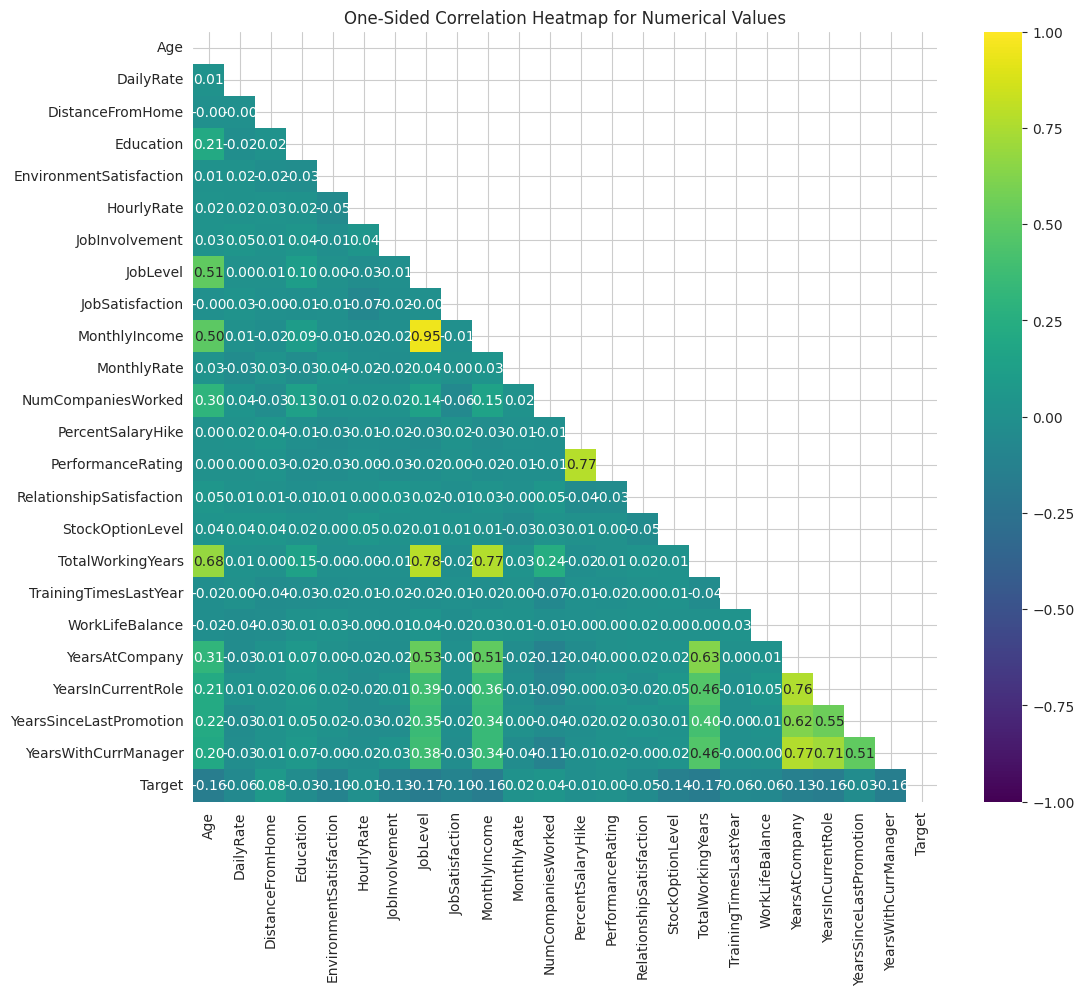

In [131]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = dftcr.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_cols.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap with a different colormap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='viridis', fmt=".2f", vmin=-1, vmax=1)
plt.title('One-Sided Correlation Heatmap for Numerical Values')
plt.show()


As illustrated in the heatmap above, the following features are positively correlated with attrition:

- Monthly Rate
- Number of Companies Worked
- Distance From Home

Conversely, the following features are negatively correlated with attrition:

- Total Working Years
- Job Level
- Years In Current Role



Summary of Findings from EDA:

- The dataset is clean with no missing or erroneous values, and all features have the correct data types.
- The strongest positive correlations with attrition are observed with the following features: Performance Rating, Monthly Rate, Number of Companies Worked, and Distance From Home.
- The strongest negative correlations with attrition are observed with the following features: Total Working Years, Job Level, Years In Current Role, and Monthly Income.
- The dataset is imbalanced, with the majority of observations describing currently active employees.
- Several features are redundant for our analysis: EmployeeCount, EmployeeNumber, StandardHours, and Over18.

Other Observations:

- Single employees have the largest proportion of leavers compared to married and divorced counterparts.
- Around 10% of leavers left the company around their 2-year anniversary.
- Loyal employees with higher salaries and more responsibilities show a lower proportion of leavers compared to their counterparts.
- Employees who live further away from work show a higher proportion of leavers.
- Employees who travel frequently show a higher proportion of leavers.
- Employees who work overtime show a higher proportion of leavers.
- Sales Representatives show a significant percentage of leavers in the dataset.
- Employees who have worked at several companies previously show a higher proportion of leavers compared to their counterparts.

# Data Preprocessing

> Machine learning algorithms typically require numerical values as their predictor variables. Therefore, we need to use techniques like Label Encoding to convert categorical labels into numerical values. However, when dealing with categorical features that have a large number of unique values, using Label Encoding alone might introduce unintended feature importance. To address this issue, we will use a combination of Label Encoding and One-Hot Encoding, as demonstrated below.

In [132]:
# Create a label encoder object
le = LabelEncoder()
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [133]:
dft.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [134]:
dft.shape

(1470, 35)

In [135]:
dft.shape

(1470, 35)

In [136]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dft.columns[1:]:
    if dft[col].dtype == 'object':
        if len(list(dft[col].unique())) <= 2:
            le.fit(dft[col])
            dft[col] = le.transform(dft[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [137]:
# convert rest of categorical variable into dummy
dft = pd.get_dummies(dft, drop_first=True)

In [138]:
dft.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        2       0          94   
1               2                        3       1          61   
2               4                        4       1          92   
3               5                        4       0          56   
4               7                        1       1          40   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0               3         2                4           5993        19479   
1               2         2                2           5130        24907   
2               2         1                3           2090         2396   
3               3         1                3           2909        23159   
4               3         1                2           3468        16632   

   NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8       0         1                 11                  3   
1                   1       0         0                 23                  4   
2                   6       0         1                 15                  3   
3                   1       0         1                 11                  3   
4                   9       0         0                 12                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4                        0                     5   
1                   7                        1                     7   
2                   0                        0                     0   
3                   7                        3                     0   
4                   2                        2                     2   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                             False                          True   
1                              True                         False   
2                             False                          True   
3                              True                         False   
4                             False                          True   

   Department_Research & Development  Department_Sales  \
0                              False              True   
1                               True             False   
2                               True             False   
3                               True             False   
4                               True             False   

   EducationField_Life Sciences  EducationField_Marketing  \
0                          True                     False   
1                   

In [139]:
dft['JobRole_Research Scientist'].value_counts()

JobRole_Research Scientist
False    1178
True      292
Name: count, dtype: int64

In [140]:
# Iterate over all columns
for column in dft.columns:
    dft[column] = dft[column].map({'False': 0, 'True': 1}) if dft[column].dtype == 'O' else dft[column]


In [141]:
dft.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        2       0          94   
1               2                        3       1          61   
2               4                        4       1          92   
3               5                        4       0          56   
4               7                        1       1          40   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0               3         2                4           5993        19479   
1               2         2                2           5130        24907   
2               2         1                3           2090         2396   
3               3         1                3           2909        23159   
4               3         1                2           3468        16632   

   NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8       0         1                 11                  3   
1                   1       0         0                 23                  4   
2                   6       0         1                 15                  3   
3                   1       0         1                 11                  3   
4                   9       0         0                 12                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4                        0                     5   
1                   7                        1                     7   
2                   0                        0                     0   
3                   7                        3                     0   
4                   2                        2                     2   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                             False                          True   
1                              True                         False   
2                             False                          True   
3                              True                         False   
4                             False                          True   

   Department_Research & Development  Department_Sales  \
0                              False              True   
1                               True             False   
2                               True             False   
3                               True             False   
4                               True             False   

   EducationField_Life Sciences  EducationField_Marketing  \
0                          True                     False   
1                   

In [142]:
columns_to_convert = [
    'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
    'Department_Research & Development', 'Department_Sales',
    'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical',
    'EducationField_Other', 'EducationField_Technical Degree',
    'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager',
    'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist',
    'JobRole_Sales Executive', 'JobRole_Sales Representative',
    'MaritalStatus_Married', 'MaritalStatus_Single'
]

for column in columns_to_convert:
    dft[column] = dft[column].map({True: 1, False: 0})


In [143]:
dft.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        2       0          94   
1               2                        3       1          61   
2               4                        4       1          92   
3               5                        4       0          56   
4               7                        1       1          40   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0               3         2                4           5993        19479   
1               2         2                2           5130        24907   
2               2         1                3           2090         2396   
3               3         1                3           2909        23159   
4               3         1                2           3468        16632   

   NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8       0         1                 11                  3   
1                   1       0         0                 23                  4   
2                   6       0         1                 15                  3   
3                   1       0         1                 11                  3   
4                   9       0         0                 12                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4                        0                     5   
1                   7                        1                     7   
2                   0                        0                     0   
3                   7                        3                     0   
4                   2                        2                     2   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                   

# Feature scaling

> Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 5.

In [144]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(dft.columns)
HR_col.remove('Attrition')
for col in HR_col:
    dft[col] = dft[col].astype(float)
    dft[[col]] = scaler.fit_transform(dft[[col]])
dft['Attrition'] = pd.to_numeric(dft['Attrition'], downcast='float')
dft.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  2.738095        1.0   3.579098          0.000000       1.25            0.0   
1  3.690476        0.0   0.633500          1.250000       0.00            0.0   
2  2.261905        1.0   4.549034          0.178571       1.25            0.0   
3  1.785714        0.0   4.617037          0.357143       3.75            0.0   
4  1.071429        0.0   1.750179          0.178571       0.00            0.0   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0        0.000000                 1.666667     0.0    4.571429   
1        0.002419                 3.333333     5.0    2.214286   
2        0.007257                 5.000000     5.0    4.428571   
3        0.009676                 5.000000     0.0    1.857143   
4        0.014514                 0.000000     5.0    0.714286   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0        3.333333      1.25         5.000000       1.312270     3.490263   
1        1.666667      1.25         1.666667       1.085045     4.580004   
2        1.666667      0.00         3.333333       0.284623     0.060630   
3        3.333333      0.00         3.333333       0.500263     4.229070   
4        3.333333      0.00         1.666667       0.647446     2.918691   

   NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  \
0            4.444444     0.0       5.0           0.000000                0.0   
1            0.555556     0.0       0.0           4.285714                5.0   
2            3.333333     0.0       5.0           1.428571                0.0   
3            0.555556     0.0       5.0           0.000000                0.0   
4            5.000000     0.0       0.0           0.357143                0.0   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                  0.000000            0.0          0.000000   
1                  5.000000            0.0          1.666667   
2                  1.666667            0.0          0.000000   
3                  3.333333            0.0          0.000000   
4                  5.000000            0.0          1.666667   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0              1.000                    0.0         0.000000            0.75   
1              1.250                    2.5         3.333333            1.25   
2              0.875                    2.5         3.333333            0.00   
3              1.000                    2.5         3.333333            1.00   
4              0.750                    2.5         3.333333            0.25   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0            1.111111                 0.000000              1.470588   
1            1.944444                 0.333333              2.058824   
2            0.000000                 0.000000              0.000000   
3            1.944444                 1.000000              0.000000   
4            0.555556                 0.666667              0.588235   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           5.0   
1                               5.0                           0.0   
2                               0.0                           5.0   
3                               5.0                           0.0   
4                               0.0                           5.0   

   Department_Research & Development  Department_Sales  \
0                                0.0               5.0   
1                                5.0               0.0   
2                                5.0               0.0   
3                                5.0               0.0   
4                                5.0               0.0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                           5.0                       0.

In [145]:
print('Size of Full Encoded Dataset: {}'. format(dft.shape))

Size of Full Encoded Dataset: (1470, 49)


In [146]:
# assign the target to a new dataframe and convert it to a numerical feature
#df_target = df_HR[['Attrition']].copy()
target = dft['Attrition'].copy()

In [147]:
type(target)

pandas.core.series.Series

In [148]:
# let's remove the target feature and redundant features from the dataset
dft.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(dft.shape))

Size of Full dataset is: (1470, 44)


In [149]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(dft,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 44)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 44)
Number transactions y_test dataset:  (368,)


# ML Models

Let's start by employing a range of baseline algorithms with default hyperparameters before delving into more advanced solutions. The algorithms we'll consider in this section include Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, and Gaussian NB.

In [150]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=7)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=7)))
models.append(('XGBoost', XGBClassifier(random_state=7)))



In [159]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
0       Logistic Regression         82.03         8.06          74.49   
7                  AdaBoost         79.05         6.78          86.29   
2                       SVM         78.88         8.21          84.48   
1             Random Forest         78.86         7.01          85.30   
8                   XGBoost         77.00         8.01          85.84   
6         Gradient Boosting         76.85         7.71          85.11   
5               Gaussian NB         75.06         5.10          68.14   
3                       KNN         66.42         9.90          84.21   
4  Decision Tree Classifier         58.02         6.23          76.22   

   Accuracy STD  
0          5.53  
7          2.91  
2          4.18  
1          3.75  
8          4.00  
6          4.43  
5          3.14  
3          4.04  
4          4.23

> **Classification Accuracy** is the number of correct predictions made as a ratio of all predictions made. <br>
It is the most common evaluation metric for classification problems. However, it is often **misused** as it is only really suitable when there are an **equal number of observations in each class** and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.

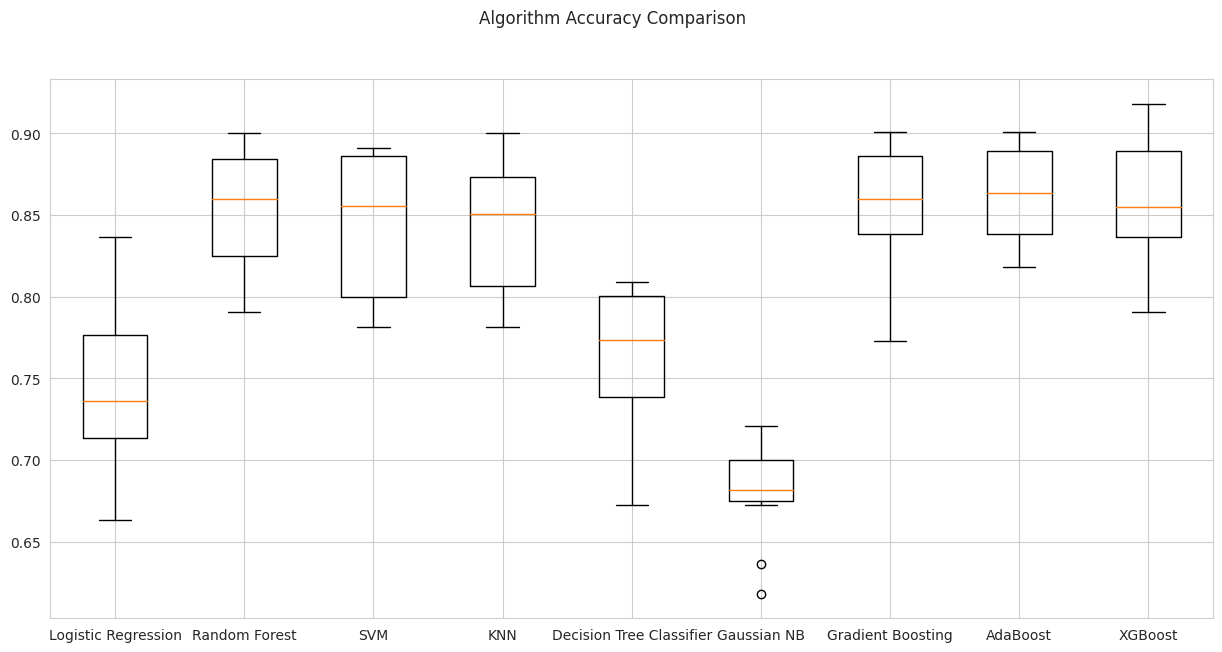

In [160]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

> **Area under ROC Curve** (or AUC for short) is a performance metric for binary classification problems. <br>
The AUC represents a **model’s ability to discriminate between positive and negative classes**. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

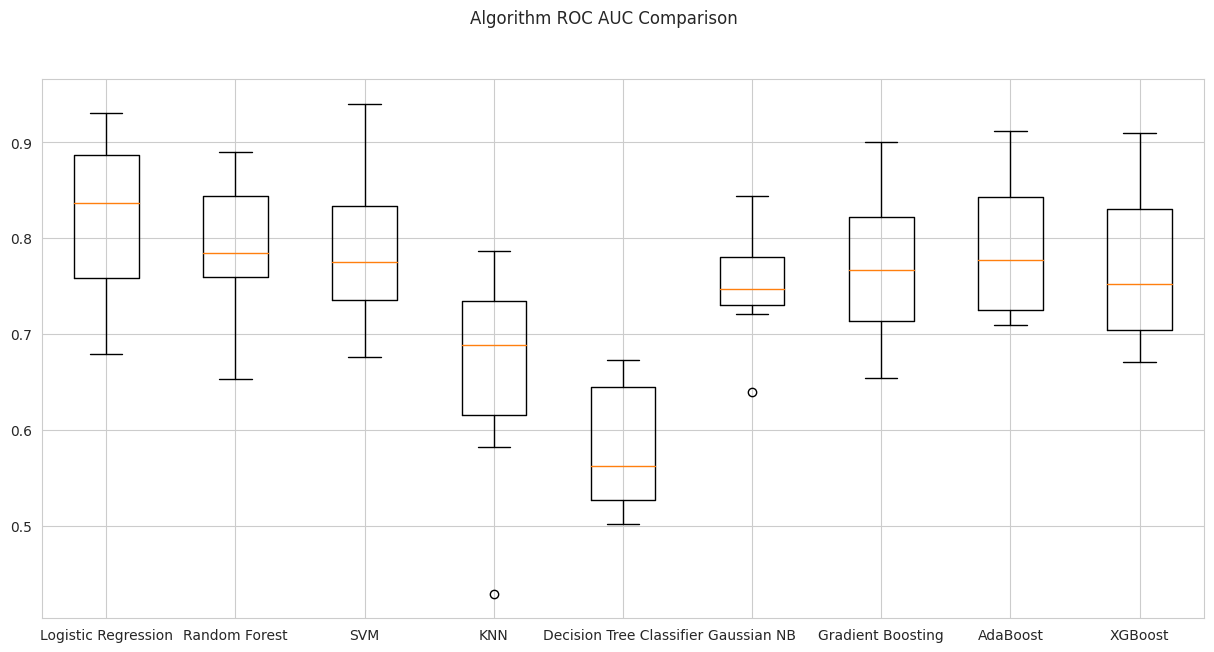

In [161]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

> Based on our ROC AUC comparison analysis, **Logistic Regression** and **Random Forest** show the highest mean AUC scores. We will shortlist these two algorithms for further analysis. See below for more details on these two algos.

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameters for Grid Search
rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20]}

gb_param_grid = {'n_estimators': [100, 200, 300],
                 'learning_rate': [0.1, 0.01, 0.001]}

xgb_param_grid = {'n_estimators': [100, 200, 300],
                  'learning_rate': [0.1, 0.01, 0.001]}

# Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=7), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

# Grid Search for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=7), gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)
gb_best_model = gb_grid_search.best_estimator_

# Grid Search for XGBoost
xgb_grid_search = GridSearchCV(XGBClassifier(random_state=7), xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)
xgb_best_model = xgb_grid_search.best_estimator_

# Evaluate the best models
rf_predictions = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

gb_predictions = gb_best_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")

xgb_predictions = xgb_best_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")


Random Forest Accuracy: 0.8586956521739131
Gradient Boosting Accuracy: 0.8831521739130435
XGBoost Accuracy: 0.8777173913043478


In [157]:
from sklearn.metrics import roc_auc_score

# Evaluate the best models
rf_predictions_proba = rf_best_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_predictions_proba)
print(f"Random Forest AUC: {rf_auc}")

gb_predictions_proba = gb_best_model.predict_proba(X_test)[:, 1]
gb_auc = roc_auc_score(y_test, gb_predictions_proba)
print(f"Gradient Boosting AUC: {gb_auc}")

xgb_predictions_proba = xgb_best_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_predictions_proba)
print(f"XGBoost AUC: {xgb_auc}")


Random Forest AUC: 0.8284241127749437
Gradient Boosting AUC: 0.8509681312050903
XGBoost AUC: 0.8285338160276452


<ipython-input-164-fc60c7477d5b>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




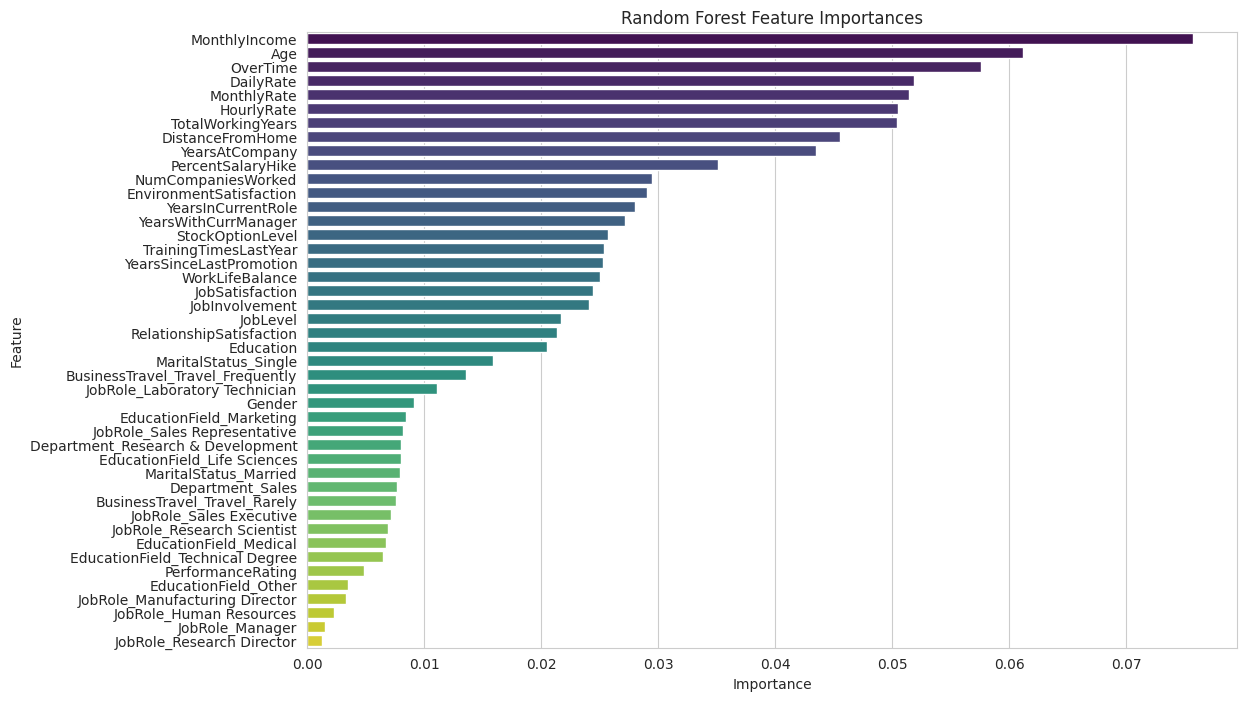

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=7)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
rf_feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_importances})

# Sort the features by importance
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importances, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [165]:
# Number of top features to display
top_n = 10

# Get the top N features and their importances
top_rf_features = rf_feature_importances.head(top_n)

# Print the table
print("Random Forest Top Features:")
print(top_rf_features.to_string(index=False))


Random Forest Top Features:
          Feature  Importance
    MonthlyIncome    0.075709
              Age    0.061216
         OverTime    0.057623
        DailyRate    0.051906
      MonthlyRate    0.051411
       HourlyRate    0.050527
TotalWorkingYears    0.050457
 DistanceFromHome    0.045575
   YearsAtCompany    0.043496
PercentSalaryHike    0.035092


> Random forest classifier helps us to find out the most effective target to find the attrition from the given features. Monthly salary has great impact on the attrition.

Here's a revised summary with a more structured and actionable approach based on the stronger indicators of people leaving:

### Factors Influencing Churn Prediction:

1. **Monthly Income**: Employees on higher wages are less likely to leave. Efforts should be made to ensure the company provides competitive wages compared to industry benchmarks in the local market.

2. **Over Time**: Employees who work overtime are more likely to leave. Efforts should focus on appropriately scoping projects upfront with adequate support and manpower to reduce the use of overtime.

3. **YearsWithCurrManager**: A large number of employees leave six months after their current managers. Using line manager details, metrics such as the number of employees under managers showing high turnover rates, the number of years the line manager has been in a particular position, and patterns in employee resignations can help determine if action is needed with a specific manager. This may include management training, mentorship assignments, or structural changes.

4. **Age**: Employees in the relatively young age bracket of 25-35 are more likely to leave. Efforts should focus on articulating the company's long-term vision and how young employees fit into that vision, as well as providing clear paths to promotion.

5. **DistanceFromHome**: Employees who live further from work are more likely to leave. Efforts should be made to provide support in the form of company transportation or transportation allowances.

6. **TotalWorkingYears**: More experienced employees are less likely to leave. Employees with between 5-8 years of experience should be identified as potentially having a higher risk of leaving and provided with additional support or incentives.

7. **YearsAtCompany**: Longer-tenured employees are less likely to leave. Employees reaching their two-year anniversary should be identified as potentially having a higher risk of leaving and efforts should be made to retain them.

### Actionable Recommendations:

- **Review Compensation**: Ensure the company provides competitive wages compared to industry standards.
- **Manage Workloads**: Scope projects properly to reduce the need for overtime.
- **Manager Training**: Provide management training for managers with high turnover rates.
- **Career Development**: Provide clear paths to promotion and long-term vision of the company for younger employees.
- **Transportation Support**: Provide transportation support for employees living far from work.
- **Retention Programs**: Implement retention programs for employees with 5-8 years of experience and approaching their two-year anniversary.

By addressing these factors and implementing the recommended actions, the company can improve employee retention and reduce churn rates.